Câu 4: Tách Thuộc tính (X) và Thuộc tính Quyết định (y

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
import numpy as np
import graphviz # Cần cài đặt thư viện này nếu muốn vẽ cây

# Tải và làm sạch dữ liệu ban đầu
file_path = '/content/mushrooms.csv'
df = pd.read_csv(file_path)
df.replace('?', np.nan, inplace=True)
df.dropna(axis=1, inplace=True)
results = []
y = df['class']
# Các thuộc tính (Features)
X = df.drop('class', axis=1)
print(f"Kích thước X: {X.shape} | Kích thước y: {y.shape}\n")
print("Nguyễn Đình Vương - 6351071081\n")

Kích thước X: (8124, 21) | Kích thước y: (8124,)

Nguyễn Đình Vương - 6351071081



Câu 5: One-Hot Encoding

In [20]:
X_encoded = pd.get_dummies(X, drop_first=True)
print(f"Kích thước X sau One-Hot Encoding: {X_encoded.shape}\n")
print("Nguyễn Đình Vương - 6351071081\n")

Kích thước X sau One-Hot Encoding: (8124, 91)

Nguyễn Đình Vương - 6351071081



Câu 6: Tách Dữ liệu Huấn luyện (70%) và Kiểm thử (30%)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42
)
print(f"Mẫu huấn luyện: {X_train.shape[0]} | Mẫu kiểm thử: {X_test.shape[0]}\n")
print("Nguyễn Đình Vương - 6351071081\n")

Mẫu huấn luyện: 5686 | Mẫu kiểm thử: 2438

Nguyễn Đình Vương - 6351071081



Câu 7: Xây dựng Cây ID3 (Entropy) và Kiểm thử

Accuracy (ID3): 1.0000
Confusion Matrix (ID3):
 [[1257    0]
 [   0 1181]]

[Sơ đồ cây ID3 (3 tầng đầu) được hiển thị bên dưới]
Nguyễn Đình Vương - 6351071081



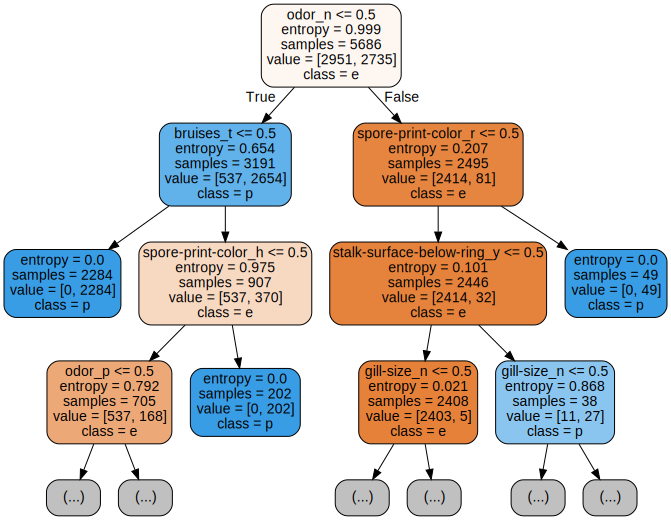

In [16]:
from sklearn.tree import export_graphviz
id3_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
id3_model.fit(X_train, y_train)

# Đánh giá
y_pred_id3 = id3_model.predict(X_test)
accuracy_id3 = accuracy_score(y_test, y_pred_id3)
cm_id3 = confusion_matrix(y_test, y_pred_id3)

print(f"Accuracy (ID3): {accuracy_id3:.4f}")
print("Confusion Matrix (ID3):\n", cm_id3)

dot_data_id3 = export_graphviz(id3_model, out_file=None,
                               feature_names=X_encoded.columns,
                               class_names=id3_model.classes_,
                               filled=True, rounded=True,
                               max_depth=3)

# Tạo đối tượng Source và in ra để Colab tự động render ảnh
graph_id3 = graphviz.Source(dot_data_id3)
print("\n[Sơ đồ cây ID3 (3 tầng đầu) được hiển thị bên dưới]")
print("Nguyễn Đình Vương - 6351071081\n")
display(graph_id3)

Câu 8:

In [17]:
# Xây dựng mô hình CART (Decision Tree với criterion='gini')
cart_model = DecisionTreeClassifier(criterion='gini', random_state=42)
cart_model.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred_cart = cart_model.predict(X_test)
accuracy_cart = accuracy_score(y_test, y_pred_cart)
cm_cart = confusion_matrix(y_test, y_pred_cart)
results.append({'Mô hình': 'CART (Gini)', 'Accuracy': accuracy_cart})

print(f"Accuracy (CART): {accuracy_cart:.4f}")
print("Confusion Matrix (CART):\n", cm_cart)
print("Nguyễn Đình Vương - 6351071081\n")

Accuracy (CART): 1.0000
Confusion Matrix (CART):
 [[1257    0]
 [   0 1181]]
Nguyễn Đình Vương - 6351071081



Câu 9

In [18]:
# Xây dựng mô hình Naïve Bayes (GaussianNB)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)
results.append({'Mô hình': 'Naïve Bayes', 'Accuracy': accuracy_nb})

print(f"Accuracy (Naïve Bayes): {accuracy_nb:.4f}")
print("Confusion Matrix (Naïve Bayes):\n", cm_nb)
print("Nguyễn Đình Vương - 6351071081\n")

Accuracy (Naïve Bayes): 0.9762
Confusion Matrix (Naïve Bayes):
 [[1200   57]
 [   1 1180]]
Nguyễn Đình Vương - 6351071081



Câu 10:

In [19]:
comparison_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

print("Bảng so sánh Độ chính xác:")
print(comparison_df.to_markdown(index=False))
print("Nguyễn Đình Vương - 6351071081\n")

Bảng so sánh Độ chính xác:
| Mô hình     |   Accuracy |
|:------------|-----------:|
| CART (Gini) |    1       |
| Naïve Bayes |    0.97621 |
Nguyễn Đình Vương - 6351071081

